# Histogram based segmentation

/opt/homebrew/lib/python3.11/site-packages/skimage/restoration/_denoise.py:1032: UserWarning: image is size 3 on the last axis, but channel_axis is None. If this is a color image, please set channel_axis=-1 for proper noise estimation.
  sigmas = [estimate_sigma(


(array([52225.,  4171.,  3393.,  2470.,     0.,  2912.,  2066.,  1763.,
         1945.,     0.,  1471.,  1567.,  1258.,  1438.,     0.,  1292.,
         1045.,  1164.,   926.,     0.,   985.,   887.,   829.,   763.,
            0.,   609.,   629.,   581.,   578.,     0.,   525.,   521.,
          486.,   439.,     0.,   386.,   366.,   365.,   356.,     0.,
          332.,   314.,   322.,   317.,     0.,   294.,   272.,   264.,
          246.,     0.,   245.,   223.,   217.,   183.,     0.,   189.,
          178.,   194.,   171.,     0.,   179.,   185.,   166.,   155.,
            0.,   185.,   166.,   163.,   166.,     0.,   182.,   182.,
          220.,   206.,     0.,   242.,   242.,   287.,   304.,     0.,
          340.,   345.,   390.,   419.,     0.,   498.,   470.,   546.,
          591.,     0.,   665.,   690.,   788.,   805.,     0.,   808.,
          855.,   890.,   818.,   751.]),
 array([ 0. ,  0.8,  1.6,  2.4,  3.2,  4. ,  4.8,  5.6,  6.4,  7.2,  8. ,
         8.8,  9.6, 

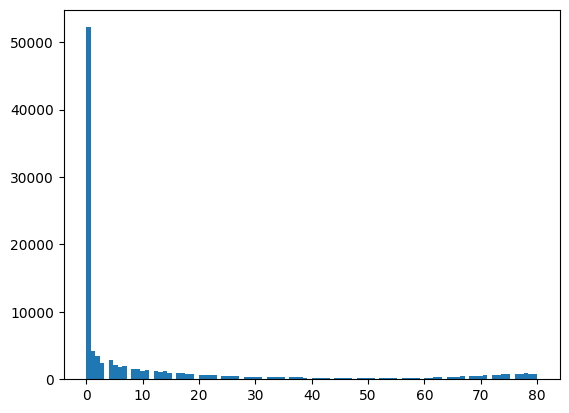

In [5]:
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage import img_as_float, img_as_ubyte
from skimage import io
import numpy as np
from matplotlib import pyplot as plt

img = img_as_float(io.imread("images/segment.jpg"))

sigma_est = np.mean(estimate_sigma(img, channel_axis=1))

#Non local denoising of the image before plotting the histogram fro segmentation
patch_kw = dict(patch_size=5,
                patch_distance=3,
                channel_axis=1)
denoise = denoise_nl_means(img, h=1.5 * sigma_est, fast_mode=True, **patch_kw)

denoise_ubyte = img_as_ubyte(denoise)
plt.hist(denoise_ubyte.flat, bins=100, range=(0,80))

